In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [9]:
REBUILD_DATA = True

class DogsVsCats():
    IMG_SIZE=50
    CATS = 'Machine_Learning/kagglecatsanddogs/PetImages/Cat/'
    DOGS = 'Machine_Learning/kagglecatsanddogs/PetImages/Dog/'
    LABELS = {CATS:0, DOGS:1}
    
    training_data = []
    catcount = 0
    dogcount = 0
    
    def make_td(self):
        for label in self.LABELS:
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label,f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img,(self.IMG_SIZE,self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                    if label == self.CATS:
                        self.catcount +=1
                    elif label == self.DOGS:
                        self.dogcount +=1
                except Exception as e:
                    pass
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print(f"Cats: {self.catcount}")
        print(f"Dogs: {self.dogcount}")

if REBUILD_DATA:
    dogsvscats = DogsVsCats()
    dogsvscats.make_td()

100%|██████████| 12501/12501 [00:10<00:00, 1240.25it/s]
/home/samar/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Cats: 12476
Dogs: 12470


In [10]:
training_data = np.load("training_data.npy", allow_pickle=True)
print(len(training_data))

24946


In [12]:
print(training_data[1])

[array([[199, 205, 204, ..., 255, 254, 245],
       [190, 192, 192, ..., 255, 245, 237],
       [180, 183, 187, ..., 250, 238, 233],
       ...,
       [ 50,  49,  50, ...,  37,  50,  39],
       [ 48,  49,  49, ...,  50,  39,  48],
       [ 47,  48,  48, ...,  38,  43,  38]], dtype=uint8)
 array([1., 0.])]


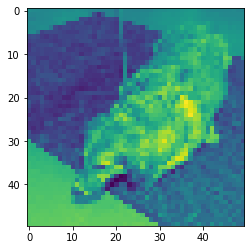

In [29]:
import matplotlib.pyplot as plt
plt.imshow(training_data[1501][0])
plt.show()

In [49]:
class Net2(nn.Module):
    def __init__(self):
        super().__init__() # just run the init of parent class (nn.Module)
        self.conv1 = nn.Conv2d(1, 32, 5) # input is 1 image, 32 output channels, 5x5 kernel / window
        self.conv2 = nn.Conv2d(32, 64, 5) # input is 32, bc the first layer output 32. Then we say the output will be 64 channels, 5x5 kernel / window
        self.conv3 = nn.Conv2d(64, 128, 5)

        x = torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 512) #flattening.
        self.fc2 = nn.Linear(512, 2) # 512 in, 2 out bc we're doing 2 classes (dog vs cat).

    def convs(self, x):
        # max pooling over 2x2
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))

        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)  # .view is reshape ... this flattens X before 
        x = F.relu(self.fc1(x))
        x = self.fc2(x) # bc this is our output layer. No activation here.
        return F.softmax(x, dim=1)


net2 = Net2()
print(net2)

Net2(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


In [50]:
# import torch 
# import torch.nn as nn
# import torch.nn.functional as F

# class Net(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv1 = nn.Conv2d(1,32, 5)
#         self.conv2 = nn.Conv2d(32,64, 5)
#         self.conv3 = nn.Conv2d(64,128,5)
        
#         x = torch.randn(50,50).view(-1,1,50,50)
#         self._to_linear = None
#         self.convs(x)
        
#         self.fc1 = nn.Linear(self._to_linear, 512)
#         self.fc2 = nn.Linear(512,2)
#     def convs(self,x):
#         x = F.max_pool2d(F.relu(self.conv1(x)), (2*2))
#         x = F.max_pool2d(F.relu(self.conv2(x)), (2*2))
#         x = F.max_pool2d(F.relu(self.conv3(x)), (2*2))
        
#         if self._to_linear is None:
#             self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
#         return x 
#     def forward(self,x):
#         x = self.convs(x)
#         x = x.view(-1, self._to_linear)
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return F.softmax(x, dim=1)

    
# net = Net()
# print(net)

In [59]:
import torch.optim as optim
optimizer = optim.Adam(net2.parameters(), lr=0.001)
loss_function=nn.MSELoss()

X = torch.tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0
y = torch.tensor([i[1] for i in training_data],dtype=torch.float32)

VAL_PCT = 0.1
val_size = int(len(X)*VAL_PCT)
print(val_size)

2494


In [60]:
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

In [61]:
BATCH_SIZE = 100
EPOCHS = 1
for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
        print(i, i+BATCH_SIZE)
        batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
        batch_y = train_y[i:i+BATCH_SIZE]
        
        net2.zero_grad
        outputs = net2(batch_X)
        loss = loss_function(outputs,batch_y)
        loss.backward()
        optimizer.step()

print(loss)        
        

  0%|          | 0/225 [00:00<?, ?it/s]

0 100


  0%|          | 1/225 [00:00<01:38,  2.27it/s]

100 200


  1%|          | 2/225 [00:00<01:33,  2.40it/s]

200 300


  1%|▏         | 3/225 [00:01<01:33,  2.37it/s]

300 400


  2%|▏         | 4/225 [00:01<01:34,  2.35it/s]

400 500


  2%|▏         | 5/225 [00:02<01:33,  2.36it/s]

500 600


  3%|▎         | 6/225 [00:02<01:31,  2.40it/s]

600 700


  3%|▎         | 7/225 [00:02<01:30,  2.42it/s]

700 800


  4%|▎         | 8/225 [00:03<01:29,  2.41it/s]

800 900


  4%|▍         | 9/225 [00:03<01:31,  2.37it/s]

900 1000


  4%|▍         | 10/225 [00:04<01:29,  2.41it/s]

1000 1100


  5%|▍         | 11/225 [00:04<01:27,  2.44it/s]

1100 1200


  5%|▌         | 12/225 [00:04<01:26,  2.46it/s]

1200 1300


  6%|▌         | 13/225 [00:05<01:25,  2.48it/s]

1300 1400


  6%|▌         | 14/225 [00:05<01:24,  2.50it/s]

1400 1500


  7%|▋         | 15/225 [00:06<01:24,  2.50it/s]

1500 1600


  7%|▋         | 16/225 [00:06<01:23,  2.50it/s]

1600 1700


  8%|▊         | 17/225 [00:07<01:26,  2.41it/s]

1700 1800


  8%|▊         | 18/225 [00:07<01:24,  2.44it/s]

1800 1900


  8%|▊         | 19/225 [00:07<01:23,  2.46it/s]

1900 2000


  9%|▉         | 20/225 [00:08<01:22,  2.48it/s]

2000 2100


  9%|▉         | 21/225 [00:08<01:25,  2.40it/s]

2100 2200


 10%|▉         | 22/225 [00:09<01:23,  2.42it/s]

2200 2300


 10%|█         | 23/225 [00:09<01:22,  2.45it/s]

2300 2400


 11%|█         | 24/225 [00:09<01:21,  2.46it/s]

2400 2500


 11%|█         | 25/225 [00:10<01:20,  2.48it/s]

2500 2600


 12%|█▏        | 26/225 [00:10<01:20,  2.48it/s]

2600 2700


 12%|█▏        | 27/225 [00:11<01:20,  2.47it/s]

2700 2800


 12%|█▏        | 28/225 [00:11<01:19,  2.47it/s]

2800 2900


 13%|█▎        | 29/225 [00:11<01:19,  2.45it/s]

2900 3000


 13%|█▎        | 30/225 [00:12<01:19,  2.44it/s]

3000 3100


 14%|█▍        | 31/225 [00:12<01:18,  2.46it/s]

3100 3200


 14%|█▍        | 32/225 [00:13<01:17,  2.48it/s]

3200 3300


 15%|█▍        | 33/225 [00:13<01:16,  2.50it/s]

3300 3400


 15%|█▌        | 34/225 [00:13<01:15,  2.52it/s]

3400 3500


 16%|█▌        | 35/225 [00:14<01:15,  2.52it/s]

3500 3600


 16%|█▌        | 36/225 [00:14<01:14,  2.53it/s]

3600 3700


 16%|█▋        | 37/225 [00:15<01:13,  2.54it/s]

3700 3800


 17%|█▋        | 38/225 [00:15<01:13,  2.55it/s]

3800 3900


 17%|█▋        | 39/225 [00:15<01:12,  2.56it/s]

3900 4000


 18%|█▊        | 40/225 [00:16<01:16,  2.40it/s]

4000 4100


 18%|█▊        | 41/225 [00:16<01:25,  2.16it/s]

4100 4200


 19%|█▊        | 42/225 [00:17<01:30,  2.02it/s]

4200 4300


 19%|█▉        | 43/225 [00:18<01:34,  1.93it/s]

4300 4400


 20%|█▉        | 44/225 [00:18<01:31,  1.97it/s]

4400 4500


 20%|██        | 45/225 [00:19<01:33,  1.93it/s]

4500 4600


 20%|██        | 46/225 [00:19<01:28,  2.03it/s]

4600 4700


 21%|██        | 47/225 [00:19<01:26,  2.06it/s]

4700 4800


 21%|██▏       | 48/225 [00:20<01:22,  2.13it/s]

4800 4900


 22%|██▏       | 49/225 [00:21<01:34,  1.86it/s]

4900 5000


 22%|██▏       | 50/225 [00:21<01:30,  1.94it/s]

5000 5100


 23%|██▎       | 51/225 [00:21<01:26,  2.02it/s]

5100 5200


 23%|██▎       | 52/225 [00:22<01:22,  2.08it/s]

5200 5300


 24%|██▎       | 53/225 [00:22<01:18,  2.19it/s]

5300 5400


 24%|██▍       | 54/225 [00:23<01:29,  1.91it/s]

5400 5500


 24%|██▍       | 55/225 [00:23<01:24,  2.01it/s]

5500 5600


 25%|██▍       | 56/225 [00:24<01:18,  2.15it/s]

5600 5700


 25%|██▌       | 57/225 [00:24<01:14,  2.24it/s]

5700 5800


 26%|██▌       | 58/225 [00:25<01:18,  2.11it/s]

5800 5900


 26%|██▌       | 59/225 [00:25<01:20,  2.07it/s]

5900 6000


 27%|██▋       | 60/225 [00:26<01:16,  2.15it/s]

6000 6100


 27%|██▋       | 61/225 [00:26<01:12,  2.25it/s]

6100 6200


 28%|██▊       | 62/225 [00:27<01:11,  2.29it/s]

6200 6300


 28%|██▊       | 63/225 [00:27<01:09,  2.33it/s]

6300 6400


 28%|██▊       | 64/225 [00:27<01:07,  2.38it/s]

6400 6500


 29%|██▉       | 65/225 [00:28<01:08,  2.35it/s]

6500 6600


 29%|██▉       | 66/225 [00:28<01:18,  2.03it/s]

6600 6700


 30%|██▉       | 67/225 [00:29<01:15,  2.11it/s]

6700 6800


 30%|███       | 68/225 [00:29<01:11,  2.19it/s]

6800 6900


 31%|███       | 69/225 [00:30<01:09,  2.26it/s]

6900 7000


 31%|███       | 70/225 [00:30<01:10,  2.19it/s]

7000 7100


 32%|███▏      | 71/225 [00:31<01:07,  2.27it/s]

7100 7200


 32%|███▏      | 72/225 [00:31<01:09,  2.20it/s]

7200 7300


 32%|███▏      | 73/225 [00:31<01:07,  2.24it/s]

7300 7400


 33%|███▎      | 74/225 [00:32<01:05,  2.29it/s]

7400 7500


 33%|███▎      | 75/225 [00:32<01:05,  2.28it/s]

7500 7600


 34%|███▍      | 76/225 [00:33<01:03,  2.33it/s]

7600 7700


 34%|███▍      | 77/225 [00:33<01:03,  2.33it/s]

7700 7800


 35%|███▍      | 78/225 [00:34<01:02,  2.37it/s]

7800 7900


 35%|███▌      | 79/225 [00:34<01:01,  2.39it/s]

7900 8000


 36%|███▌      | 80/225 [00:34<00:59,  2.42it/s]

8000 8100


 36%|███▌      | 81/225 [00:35<00:59,  2.44it/s]

8100 8200


 36%|███▋      | 82/225 [00:35<01:04,  2.23it/s]

8200 8300


 37%|███▋      | 83/225 [00:36<01:03,  2.23it/s]

8300 8400


 37%|███▋      | 84/225 [00:36<01:01,  2.31it/s]

8400 8500


 38%|███▊      | 85/225 [00:37<00:59,  2.36it/s]

8500 8600


 38%|███▊      | 86/225 [00:37<00:57,  2.40it/s]

8600 8700


 39%|███▊      | 87/225 [00:37<00:56,  2.42it/s]

8700 8800


 39%|███▉      | 88/225 [00:38<00:56,  2.44it/s]

8800 8900


 40%|███▉      | 89/225 [00:38<00:55,  2.45it/s]

8900 9000


 40%|████      | 90/225 [00:39<01:02,  2.17it/s]

9000 9100


 40%|████      | 91/225 [00:39<01:05,  2.06it/s]

9100 9200


 41%|████      | 92/225 [00:40<01:01,  2.17it/s]

9200 9300


 41%|████▏     | 93/225 [00:40<00:58,  2.26it/s]

9300 9400


 42%|████▏     | 94/225 [00:41<00:56,  2.34it/s]

9400 9500


 42%|████▏     | 95/225 [00:41<00:54,  2.40it/s]

9500 9600


 43%|████▎     | 96/225 [00:41<00:53,  2.43it/s]

9600 9700


 43%|████▎     | 97/225 [00:42<00:52,  2.45it/s]

9700 9800


 44%|████▎     | 98/225 [00:42<00:51,  2.47it/s]

9800 9900


 44%|████▍     | 99/225 [00:43<00:50,  2.48it/s]

9900 10000


 44%|████▍     | 100/225 [00:43<00:50,  2.47it/s]

10000 10100


 45%|████▍     | 101/225 [00:43<00:52,  2.38it/s]

10100 10200


 45%|████▌     | 102/225 [00:44<00:52,  2.33it/s]

10200 10300


 46%|████▌     | 103/225 [00:44<00:52,  2.31it/s]

10300 10400


 46%|████▌     | 104/225 [00:45<00:52,  2.28it/s]

10400 10500


 47%|████▋     | 105/225 [00:45<00:52,  2.27it/s]

10500 10600


 47%|████▋     | 106/225 [00:46<00:53,  2.24it/s]

10600 10700


 48%|████▊     | 107/225 [00:46<00:52,  2.24it/s]

10700 10800


 48%|████▊     | 108/225 [00:47<01:02,  1.86it/s]

10800 10900


 48%|████▊     | 109/225 [00:48<01:08,  1.69it/s]

10900 11000


 49%|████▉     | 110/225 [00:48<01:07,  1.70it/s]

11000 11100


 49%|████▉     | 111/225 [00:49<01:00,  1.88it/s]

11100 11200


 50%|████▉     | 112/225 [00:49<00:55,  2.03it/s]

11200 11300


 50%|█████     | 113/225 [00:49<00:51,  2.16it/s]

11300 11400


 51%|█████     | 114/225 [00:50<00:49,  2.25it/s]

11400 11500


 51%|█████     | 115/225 [00:50<00:49,  2.22it/s]

11500 11600


 52%|█████▏    | 116/225 [00:51<00:47,  2.29it/s]

11600 11700


 52%|█████▏    | 117/225 [00:51<00:46,  2.35it/s]

11700 11800


 52%|█████▏    | 118/225 [00:51<00:44,  2.40it/s]

11800 11900


 53%|█████▎    | 119/225 [00:52<00:43,  2.42it/s]

11900 12000


 53%|█████▎    | 120/225 [00:52<00:42,  2.45it/s]

12000 12100


 54%|█████▍    | 121/225 [00:53<00:42,  2.47it/s]

12100 12200


 54%|█████▍    | 122/225 [00:53<00:41,  2.49it/s]

12200 12300


 55%|█████▍    | 123/225 [00:53<00:40,  2.50it/s]

12300 12400


 55%|█████▌    | 124/225 [00:54<00:40,  2.49it/s]

12400 12500


 56%|█████▌    | 125/225 [00:54<00:40,  2.49it/s]

12500 12600


 56%|█████▌    | 126/225 [00:55<00:40,  2.47it/s]

12600 12700


 56%|█████▋    | 127/225 [00:55<00:39,  2.48it/s]

12700 12800


 57%|█████▋    | 128/225 [00:55<00:39,  2.49it/s]

12800 12900


 57%|█████▋    | 129/225 [00:56<00:38,  2.50it/s]

12900 13000


 58%|█████▊    | 130/225 [00:56<00:38,  2.50it/s]

13000 13100


 58%|█████▊    | 131/225 [00:57<00:37,  2.50it/s]

13100 13200


 59%|█████▊    | 132/225 [00:57<00:37,  2.50it/s]

13200 13300


 59%|█████▉    | 133/225 [00:57<00:36,  2.49it/s]

13300 13400


 60%|█████▉    | 134/225 [00:58<00:36,  2.50it/s]

13400 13500


 60%|██████    | 135/225 [00:58<00:36,  2.50it/s]

13500 13600


 60%|██████    | 136/225 [00:59<00:35,  2.50it/s]

13600 13700


 61%|██████    | 137/225 [00:59<00:35,  2.49it/s]

13700 13800


 61%|██████▏   | 138/225 [00:59<00:34,  2.49it/s]

13800 13900


 62%|██████▏   | 139/225 [01:00<00:34,  2.49it/s]

13900 14000


 62%|██████▏   | 140/225 [01:00<00:34,  2.49it/s]

14000 14100


 63%|██████▎   | 141/225 [01:01<00:33,  2.49it/s]

14100 14200


 63%|██████▎   | 142/225 [01:01<00:33,  2.49it/s]

14200 14300


 64%|██████▎   | 143/225 [01:01<00:32,  2.49it/s]

14300 14400


 64%|██████▍   | 144/225 [01:02<00:32,  2.49it/s]

14400 14500


 64%|██████▍   | 145/225 [01:02<00:32,  2.49it/s]

14500 14600


 65%|██████▍   | 146/225 [01:03<00:31,  2.49it/s]

14600 14700


 65%|██████▌   | 147/225 [01:03<00:31,  2.50it/s]

14700 14800


 66%|██████▌   | 148/225 [01:03<00:30,  2.51it/s]

14800 14900


 66%|██████▌   | 149/225 [01:04<00:30,  2.49it/s]

14900 15000


 67%|██████▋   | 150/225 [01:04<00:29,  2.50it/s]

15000 15100


 67%|██████▋   | 151/225 [01:05<00:29,  2.50it/s]

15100 15200


 68%|██████▊   | 152/225 [01:05<00:29,  2.51it/s]

15200 15300


 68%|██████▊   | 153/225 [01:05<00:28,  2.51it/s]

15300 15400


 68%|██████▊   | 154/225 [01:06<00:28,  2.50it/s]

15400 15500


 69%|██████▉   | 155/225 [01:06<00:27,  2.51it/s]

15500 15600


 69%|██████▉   | 156/225 [01:07<00:27,  2.51it/s]

15600 15700


 70%|██████▉   | 157/225 [01:07<00:27,  2.51it/s]

15700 15800


 70%|███████   | 158/225 [01:07<00:26,  2.51it/s]

15800 15900


 71%|███████   | 159/225 [01:08<00:26,  2.50it/s]

15900 16000


 71%|███████   | 160/225 [01:08<00:25,  2.50it/s]

16000 16100


 72%|███████▏  | 161/225 [01:09<00:25,  2.50it/s]

16100 16200


 72%|███████▏  | 162/225 [01:09<00:25,  2.50it/s]

16200 16300


 72%|███████▏  | 163/225 [01:09<00:24,  2.49it/s]

16300 16400


 73%|███████▎  | 164/225 [01:10<00:24,  2.49it/s]

16400 16500


 73%|███████▎  | 165/225 [01:10<00:25,  2.36it/s]

16500 16600


 74%|███████▍  | 166/225 [01:11<00:26,  2.26it/s]

16600 16700


 74%|███████▍  | 167/225 [01:11<00:25,  2.25it/s]

16700 16800


 75%|███████▍  | 168/225 [01:12<00:25,  2.23it/s]

16800 16900


 75%|███████▌  | 169/225 [01:12<00:25,  2.21it/s]

16900 17000


 76%|███████▌  | 170/225 [01:13<00:24,  2.23it/s]

17000 17100


 76%|███████▌  | 171/225 [01:13<00:24,  2.23it/s]

17100 17200


 76%|███████▋  | 172/225 [01:13<00:23,  2.23it/s]

17200 17300


 77%|███████▋  | 173/225 [01:14<00:22,  2.29it/s]

17300 17400


 77%|███████▋  | 174/225 [01:14<00:21,  2.35it/s]

17400 17500


 78%|███████▊  | 175/225 [01:15<00:21,  2.28it/s]

17500 17600


 78%|███████▊  | 176/225 [01:15<00:20,  2.34it/s]

17600 17700


 79%|███████▊  | 177/225 [01:16<00:20,  2.32it/s]

17700 17800


 79%|███████▉  | 178/225 [01:16<00:20,  2.33it/s]

17800 17900


 80%|███████▉  | 179/225 [01:16<00:20,  2.30it/s]

17900 18000


 80%|████████  | 180/225 [01:17<00:19,  2.26it/s]

18000 18100


 80%|████████  | 181/225 [01:17<00:19,  2.28it/s]

18100 18200


 81%|████████  | 182/225 [01:18<00:18,  2.30it/s]

18200 18300


 81%|████████▏ | 183/225 [01:18<00:17,  2.35it/s]

18300 18400


 82%|████████▏ | 184/225 [01:19<00:18,  2.27it/s]

18400 18500


 82%|████████▏ | 185/225 [01:19<00:17,  2.25it/s]

18500 18600


 83%|████████▎ | 186/225 [01:20<00:16,  2.30it/s]

18600 18700


 83%|████████▎ | 187/225 [01:20<00:16,  2.25it/s]

18700 18800


 84%|████████▎ | 188/225 [01:20<00:16,  2.31it/s]

18800 18900


 84%|████████▍ | 189/225 [01:21<00:15,  2.34it/s]

18900 19000


 84%|████████▍ | 190/225 [01:21<00:14,  2.38it/s]

19000 19100


 85%|████████▍ | 191/225 [01:22<00:14,  2.34it/s]

19100 19200


 85%|████████▌ | 192/225 [01:22<00:14,  2.32it/s]

19200 19300


 86%|████████▌ | 193/225 [01:23<00:13,  2.32it/s]

19300 19400


 86%|████████▌ | 194/225 [01:23<00:13,  2.37it/s]

19400 19500


 87%|████████▋ | 195/225 [01:23<00:12,  2.40it/s]

19500 19600


 87%|████████▋ | 196/225 [01:24<00:11,  2.43it/s]

19600 19700


 88%|████████▊ | 197/225 [01:24<00:11,  2.46it/s]

19700 19800


 88%|████████▊ | 198/225 [01:25<00:10,  2.47it/s]

19800 19900


 88%|████████▊ | 199/225 [01:25<00:10,  2.48it/s]

19900 20000


 89%|████████▉ | 200/225 [01:25<00:10,  2.49it/s]

20000 20100


 89%|████████▉ | 201/225 [01:26<00:09,  2.49it/s]

20100 20200


 90%|████████▉ | 202/225 [01:26<00:09,  2.50it/s]

20200 20300


 90%|█████████ | 203/225 [01:27<00:08,  2.50it/s]

20300 20400


 91%|█████████ | 204/225 [01:27<00:08,  2.49it/s]

20400 20500


 91%|█████████ | 205/225 [01:27<00:08,  2.50it/s]

20500 20600


 92%|█████████▏| 206/225 [01:28<00:07,  2.47it/s]

20600 20700


 92%|█████████▏| 207/225 [01:28<00:07,  2.46it/s]

20700 20800


 92%|█████████▏| 208/225 [01:29<00:06,  2.47it/s]

20800 20900


 93%|█████████▎| 209/225 [01:29<00:06,  2.47it/s]

20900 21000


 93%|█████████▎| 210/225 [01:29<00:06,  2.23it/s]

21000 21100


 94%|█████████▍| 211/225 [01:30<00:06,  2.21it/s]

21100 21200


 94%|█████████▍| 212/225 [01:30<00:05,  2.19it/s]

21200 21300


 95%|█████████▍| 213/225 [01:31<00:05,  2.20it/s]

21300 21400


 95%|█████████▌| 214/225 [01:31<00:04,  2.23it/s]

21400 21500


 96%|█████████▌| 215/225 [01:32<00:04,  2.07it/s]

21500 21600


 96%|█████████▌| 216/225 [01:32<00:04,  2.12it/s]

21600 21700


 96%|█████████▋| 217/225 [01:33<00:03,  2.21it/s]

21700 21800


 97%|█████████▋| 218/225 [01:33<00:03,  2.17it/s]

21800 21900


 97%|█████████▋| 219/225 [01:34<00:02,  2.18it/s]

21900 22000


 98%|█████████▊| 220/225 [01:34<00:02,  2.23it/s]

22000 22100


 98%|█████████▊| 221/225 [01:35<00:01,  2.25it/s]

22100 22200


 99%|█████████▊| 222/225 [01:35<00:01,  2.21it/s]

22200 22300


 99%|█████████▉| 223/225 [01:35<00:00,  2.24it/s]

22300 22400


100%|█████████▉| 224/225 [01:36<00:00,  2.27it/s]

22400 22500


100%|██████████| 225/225 [01:36<00:00,  2.33it/s]

tensor(0.2393, grad_fn=<MseLossBackward>)


In [62]:
correct = 0
total = 0
with torch.no_grad():
    for i in tqdm(range(len(test_X))):
        real_class = torch.argmax(test_y[i])
        net_out = net2(test_X[i].view(-1,1,50,50))[0]
        predicted_class = torch.argmax(net_out)
        if predicted_class == real_class:
            correct += 1
        total += 1
print(f"Accuracy: {round(correct/total,3)}")        

100%|██████████| 2494/2494 [00:05<00:00, 491.11it/s]

Accuracy: 0.5
